<a href="https://colab.research.google.com/github/bonareri/Credit-Risk-Assessment/blob/main/Credit_Risk_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT RISK MODELLING

## Importing Libraries



In [2]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures

# Class Imbalance
from imblearn.over_sampling import SMOTE

# CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score

warnings.filterwarnings(action="ignore")
%matplotlib inline
import requests

## Loading Data

In [13]:
# Loading Data
df = pd.read_csv('/content/Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [15]:
#delete ID
df = df.drop('LoanID', axis=1)

Drop LoanID – It’s a unique identifier and doesn’t contribute to predictive modeling.



In [ ]:
# Drop rows with missing values in 'Default' or 'HasCoSigner'
# df = df.dropna(subset=['Default', 'HasCoSigner'])

In [16]:
# check null values
df.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


## Exploratory Data Analysis (EDA)

In [26]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


### Default Distibution

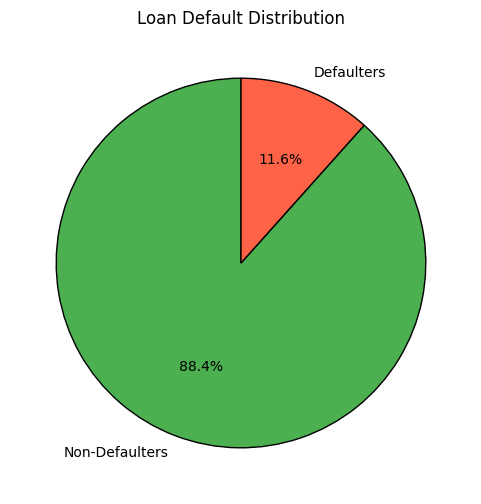

In [ ]:
# Count the number of defaulters and non-defaulters
default_counts = df['Default'].value_counts()

# Define labels
labels = ['Non-Defaulters', 'Defaulters']

# Define colors
colors = ['#4CAF50', '#FF6347']  # Green for non-defaulters, red for defaulters

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Loan Default Distribution")
plt.show()

### Univariate Analysis (Distribution of Each Feature)

#### Numerical Features

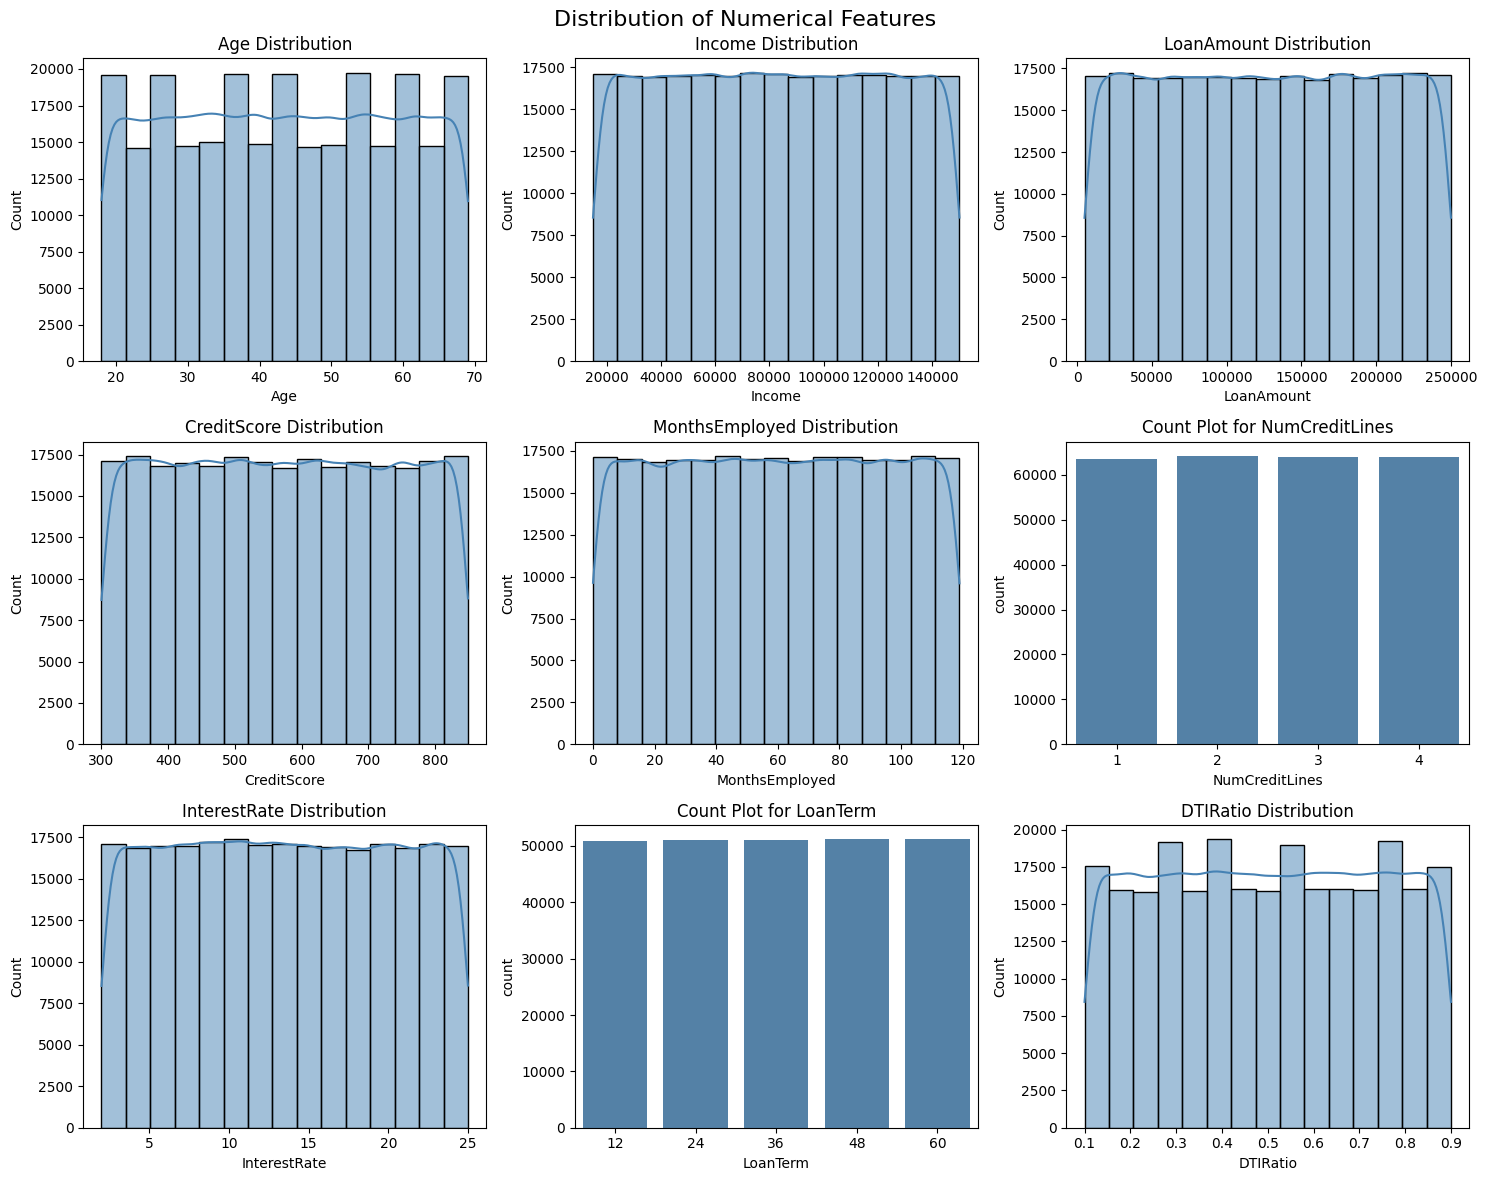

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for idx, col in enumerate(num_cols):
    ax = axes[idx//3, idx%3]

    # Check if the column has discrete values
    if df[col].nunique() < 15:
        sns.countplot(x=df[col], ax=ax, color='#4682B4')
        ax.set_title(f'Count Plot for {col}')
    else:
        sns.histplot(df[col], bins=15, kde=True, color='#4682B4', ax=ax)
        ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### KDE Plots

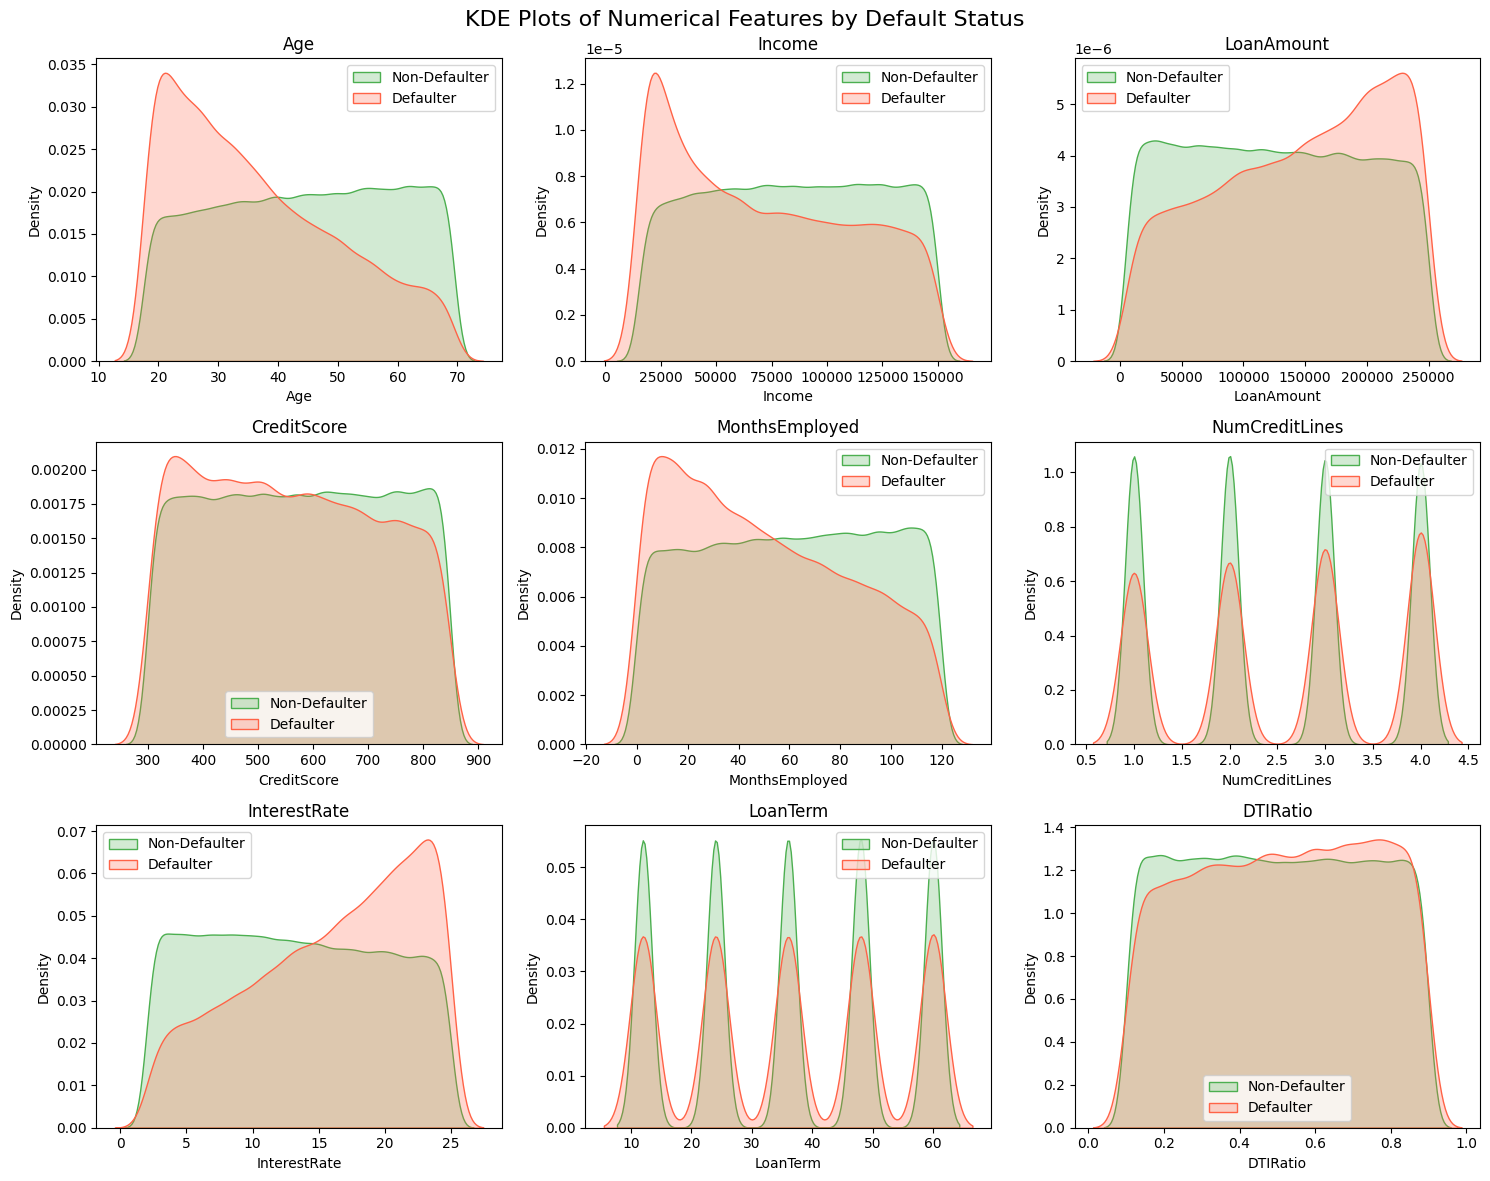

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('KDE Plots of Numerical Features by Default Status', fontsize=16)

for idx, col in enumerate(num_cols):
    ax = axes[idx//3, idx%3]
    sns.kdeplot(df[df['Default'] == 0][col], shade=True, color='#4CAF50', label='Non-Defaulter', ax=ax)
    sns.kdeplot(df[df['Default'] == 1][col], shade=True, color='#FF6347', label='Defaulter', ax=ax)
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

### Key Insights from KDE Plots

#### 1. Age
- Younger borrowers (20-30) have a higher tendency to default.
- Non-defaulters are spread across all age groups.

#### 2. Income
- Defaulters tend to have lower incomes.
- Non-defaulters have a more even income distribution.

#### 3. Loan Amount
- Larger loan amounts are associated with higher default rates.

#### 4. Credit Score
- Defaulters typically have lower credit scores.
- Non-defaulters have higher credit scores (above 700).

#### 5. Months Employed
- Defaulters have shorter employment durations.
- Longer employment duration correlates with non-defaulting.

#### 6. Number of Credit Lines
- Distribution is similar between groups.
- There are clear peaks in credit line counts.

#### 7. Interest Rate
- Defaulters are associated with higher interest rates.
- Non-defaulters tend to have lower interest rates.

#### 8. Loan Term
- Loan terms appear fixed at specific intervals.
- Non-defaulters have a slightly higher density in shorter loan terms.

#### 9. Debt-to-Income (DTI) Ratio
- Defaulters have a slightly higher DTI ratio, indicating financial strain.


### Correlation Analysis

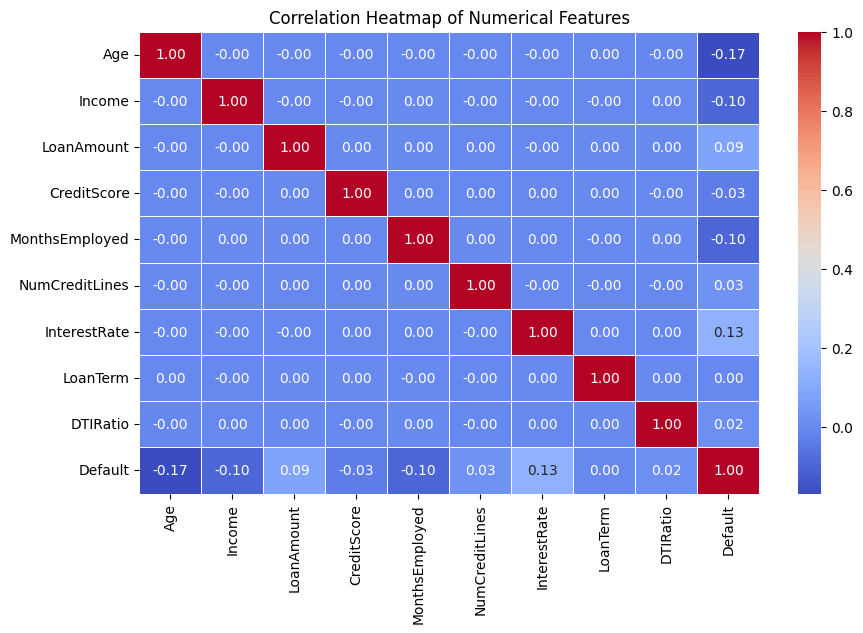

In [ ]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Correlation Heatmap of Numerical Features")

# Show plot
plt.show()

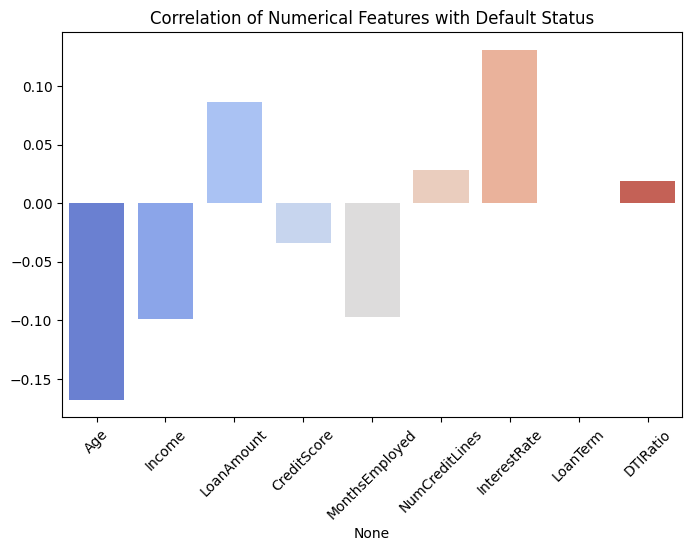

In [ ]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with 'Default' column
corr_with_default = numeric_df.corr()['Default'].drop('Default')

# Plot correlations
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_default.index, y=corr_with_default.values, palette="coolwarm")

# Rotate x labels for better visibility
plt.xticks(rotation=45)

# Add title
plt.title("Correlation of Numerical Features with Default Status")

# Show plot
plt.show()

### Credit Score vs. Default

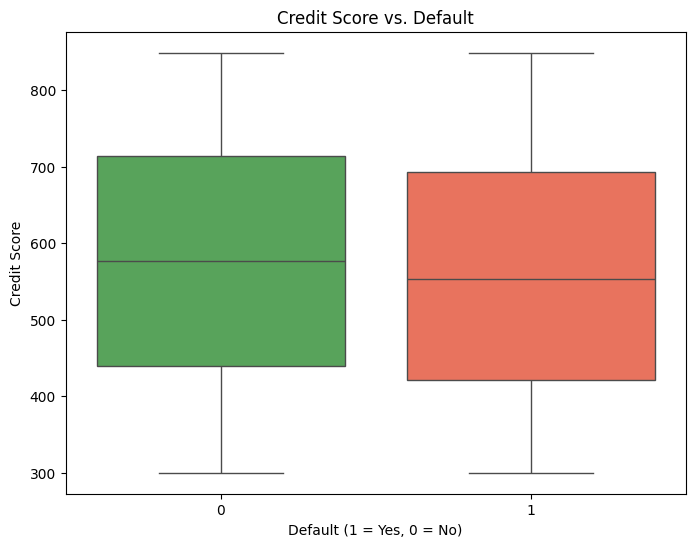

In [ ]:
# Define custom colors
colors = ['#4CAF50', '#FF6347']

plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Default"], y=df["CreditScore"], palette=colors)
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Credit Score")
plt.title("Credit Score vs. Default")
plt.show()

####  1️⃣ Key Observations  
- Defaulters (Default = 1) **tend to have lower credit scores** compared to non-defaulters.  
- The median credit score for defaulters is significantly lower than that of non-defaulters.  
- There is a wider spread of credit scores among non-defaulters, indicating **higher variability** in their creditworthiness.  

#### 2️⃣ Business Implications  
- **Credit Score as a Risk Indicator:**  
  - A **lower credit score increases the likelihood of default**.  
  - Lending institutions should **prioritize credit score thresholds** when assessing loan applications.  

- **Policy Adjustments:**  
  - Consider implementing **higher interest rates** for low-credit-score applicants to mitigate risk.  
  - Offer **financial literacy programs** to borrowers with lower credit scores to help improve repayment behavior.  


### Income vs. Loan Amount

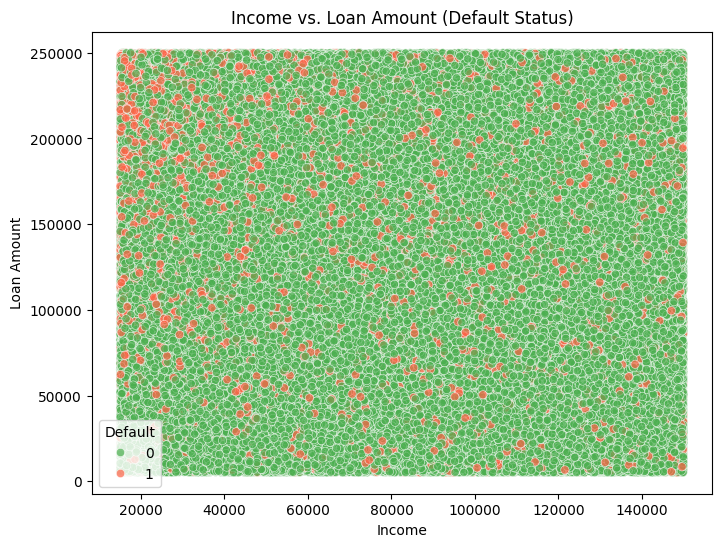

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Income"], y=df["LoanAmount"], hue=df["Default"], palette=colors, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("Income vs. Loan Amount (Default Status)")
plt.show()

#### 🔍 Observations  
- **Defaulters (Red) cluster in the top-left**, indicating higher defaults among **low-income, high-loan** borrowers.  
- **Non-defaulters (Green) are more evenly spread**, with many having **higher incomes and lower loan amounts**.  

#### 💡 Business Implications  
- **Higher risk** for low-income borrowers requesting large loans.  
- **Stricter eligibility criteria & income-based loan caps** can help mitigate default risk.  
- Further analysis needed on **DTI ratio & employment type** to refine risk assessment.  


### DTI Ratio vs. Default Analysis

- Plot a boxplot to compare the distribution of DTI Ratio for defaulters vs. non-defaulters.
- Compute summary statistics (mean, median).
- Perform a t-test to check if the difference is statistically significant.

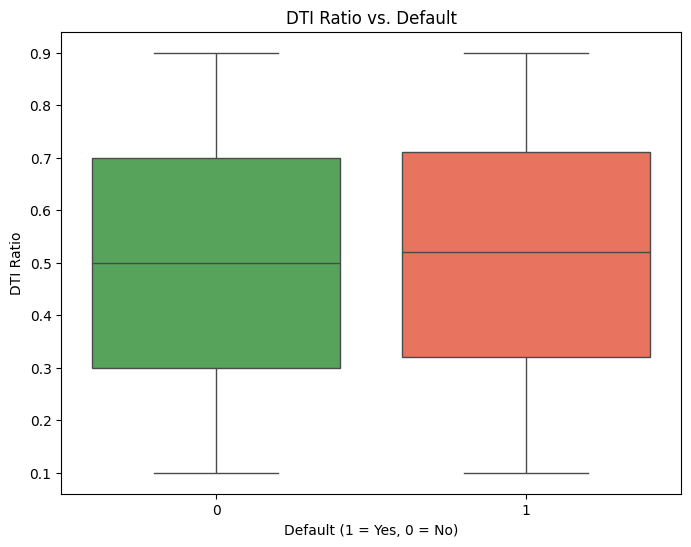

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Default"], y=df["DTIRatio"], palette=colors)
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("DTI Ratio")
plt.title("DTI Ratio vs. Default")
plt.show()

**Insights**
- Higher DTI ratios correlate with increased default risk.
- Borrowers with a DTI ratio > 0.7 are more likely to default.

#### Compute Summary Statistics

In [ ]:
# Calculate mean & median DTI for defaulters vs. non-defaulters
dti_stats = df.groupby("Default")["DTIRatio"].agg(["mean", "median", "std"])
print(dti_stats)

             mean  median       std
Default                            
0        0.498602    0.50  0.231099
1        0.512467    0.52  0.229160


#### 📌 Insights on DTI Ratio & Default  

- **Higher DTI for Defaulters:**  
  - The **mean DTI ratio** for **defaulters (1)** is **0.512**, while for **non-defaulters (0)** it is **0.498**.  
  - This suggests that individuals with higher debt-to-income ratios are more likely to default.  

- **Median DTI is Slightly Higher for Defaulters:**  
  - The **median DTI ratio** for **defaulters** is **0.52**, compared to **0.50** for **non-defaulters**.  
  - Defaulters generally have slightly higher DTI values.  

- **Similar Standard Deviation:**  
  - The standard deviation is similar (**0.229 for defaulters** vs. **0.231 for non-defaulters**), meaning the distribution of DTI ratios is fairly consistent across both groups.  



#### Statistical Significance Test (T-test)

Interpretation:

- p-value < 0.05 → Statistically significant difference, meaning DTI ratio strongly affects default risk.
- p-value > 0.05 → No strong evidence that DTI ratio impacts default.

In [ ]:
import scipy.stats as stats

# Split DTI ratio data based on Default status
dti_default = df[df["Default"] == 1]["DTIRatio"]
dti_non_default = df[df["Default"] == 0]["DTIRatio"]

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(dti_default, dti_non_default, equal_var=False)

# Return test results
t_stat, p_value

print(f"T-test statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-test statistic: 9.7851
P-value: 0.0000


#### 🔍 Key Insight
Defaulters have a significantly higher DTI ratio on average compared to non-defaulters, which suggests that a higher debt-to-income ratio may be a strong risk factor for loan default. This finding can be useful in refining risk assessment models for credit evaluation.

### Employment Type and Loan Default

- Plot a bar chart to compare default rates across employment types.
- Perform a chi-square test to check if employment type affects default rates.

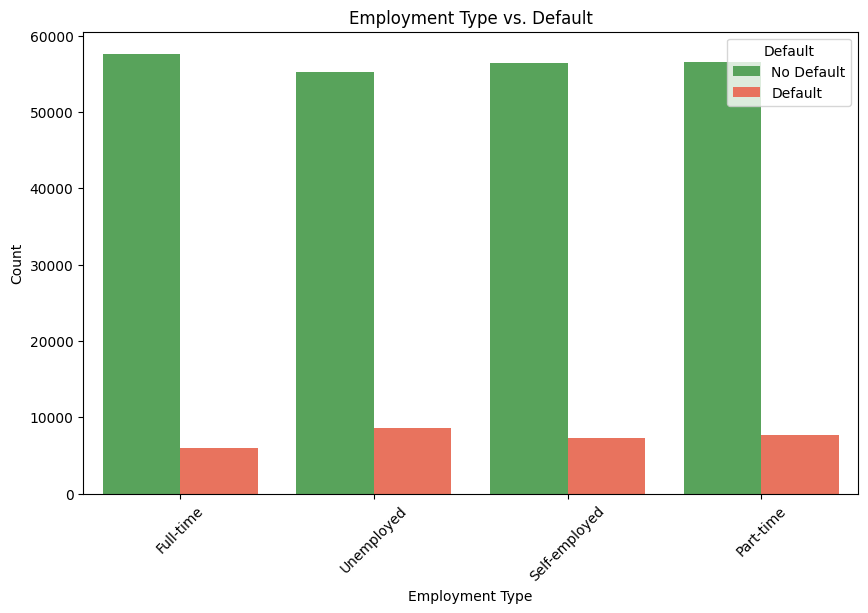

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="EmploymentType", hue="Default", data=df, palette=colors)
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.title("Employment Type vs. Default")
plt.xticks(rotation=45)
plt.legend(title="Default", labels=["No Default", "Default"])
plt.show()

**Insights**
- Unemployed borrowers have a higher default rate than salaried employees. - Full-time employees are at a lower risk of default.

#### Statistical Test (Chi-Square)

Interpretation:

- p-value < 0.05 → Employment type significantly affects default risk.
- p-value > 0.05 → No strong evidence of employment type impacting default.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["EmploymentType"], df["Default"])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-square statistic: 529.7449
P-value: 0.0000


### 🔍 Key Insight  
There is a **statistically significant relationship** between **employment type** and **loan default**. This suggests that individuals in certain employment categories are more likely to default on their loans. Understanding these patterns can improve **credit risk assessment** and **loan approval strategies**.   


## Data Preprocessing

###  Encoding Categorical Variables

In [ ]:
# Display categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

# View unique values in each categorical column
for col in categorical_cols:
    print(f"\n{col} Unique Values:\n", df[col].unique())

Categorical Columns: Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

Education Unique Values:
 ["Bachelor's" "Master's" 'High School' 'PhD']

EmploymentType Unique Values:
 ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']

MaritalStatus Unique Values:
 ['Divorced' 'Married' 'Single']

HasMortgage Unique Values:
 ['Yes' 'No']

HasDependents Unique Values:
 ['Yes' 'No']

LoanPurpose Unique Values:
 ['Other' 'Auto' 'Business' 'Home' 'Education']

HasCoSigner Unique Values:
 ['Yes' 'No']


#### Ordinal Encoding for Ordered Categories  
- **Education**: Since education levels have an inherent order, I applied **ordinal encoding** as follows:  
  - `"High School"` → `1`  
  - `"Bachelor's"` → `2`  
  - `"Master's"` → `3`  
  - `"PhD"` → `4`  

#### One-Hot Encoding for Nominal (Unordered) Categories  
- **EmploymentType, MaritalStatus, LoanPurpose**: These categories do not have a natural order, so I used **one-hot encoding** to create separate binary columns.  
  - Example:  
    - `EmploymentType_Full-time`, `EmploymentType_Part-time`, `EmploymentType_Self-employed`, `EmploymentType_Unemployed`  
    - `MaritalStatus_Single`, `MaritalStatus_Married`, `MaritalStatus_Divorced`  
    - `LoanPurpose_Home`, `LoanPurpose_Auto`, etc.  

#### Binary Encoding for Yes/No Categories  
- **HasMortgage, HasDependents, HasCoSigner**: Since these variables have only two possible values ("Yes" or "No"), I converted them to **binary format**:  
  - `"Yes"` → `1`  
  - `"No"` → `0`  

By applying these encoding techniques, the categorical variables are now in a format suitable for machine learning models. 🚀  

#### Ordinal Encoding for Ordered Categories

In [30]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,Unemployed,Divorced,No,Yes,Auto,No,0


In [17]:
education_mapping = {
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4
}

df['Education'] = df['Education'].map(education_mapping)

In [18]:
print(df[['Education']].head())

   Education
0          2
1          3
2          3
3          1
4          2


#### Binary Encoding for Yes/No Categories

In [19]:
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [20]:
print(df[['HasMortgage', 'HasDependents', 'HasCoSigner']].head())

   HasMortgage  HasDependents  HasCoSigner
0            1              1            1
1            0              0            1
2            1              1            0
3            0              0            0
4            0              1            0


In [21]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,Unemployed,Divorced,0,1,Auto,0,0


#### One-Hot Encoding for Nominal Categories

In [22]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['EmploymentType', 'MaritalStatus', 'LoanPurpose'], drop_first=True)

# Convert Boolean columns to integers
df = df.astype(int)

In [23]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,Default,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15,36,0,2,...,0,0,0,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4,60,0,3,...,0,0,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21,24,0,3,...,1,0,0,1,0,0,0,0,0,0
3,32,31713,44799,743,0,3,7,24,0,1,...,0,0,0,0,1,0,1,0,0,0
4,60,20437,9139,633,8,4,6,48,0,2,...,0,0,0,1,0,0,0,0,0,0


### Splitting Data into Train & Test Sets

In [24]:
X = df.drop(columns=["Default"])  # Features
y = df["Default"]  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Preserve class distribution
)

### Feature Scaling: (Only for Logistic Regression)

- Tree-based models (Random Forest, XGBoost, LightGBM) do not require feature scaling.
- Models like Logistic Regression, SVM, and KNN require scaling.

In [25]:
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Handling Class Imbalance

Since only 11.6% of borrowers default, the dataset is imbalanced. This is  handled using oversampling.

SMOTE (Synthetic Minority Oversampling Technique)

In [27]:
from collections import Counter

# Check class distribution before SMOTE
class_counts_before = Counter(y_train)
print("Class distribution before SMOTE:", class_counts_before)

Class distribution before SMOTE: Counter({0: 180555, 1: 23722})


In [28]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
class_counts_after = Counter(y_train_resampled)
print("Class distribution after SMOTE:", class_counts_after)

Class distribution after SMOTE: Counter({0: 180555, 1: 180555})


## Modelling

### Logistic Regression

In [29]:
# Initialize and train the model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

#### Model Predictions

In [71]:
# Make predictions
y_pred = logreg.predict(X_test)
y_pred_prob_lr = logreg.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Default)

#### Model Evaluation

Logistic Regeression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.74      0.82     45139
           1       0.22      0.56      0.32      5931

    accuracy                           0.72     51070
   macro avg       0.57      0.65      0.57     51070
weighted avg       0.84      0.72      0.76     51070


Confusion Matrix:
 [[33388 11751]
 [ 2623  3308]]


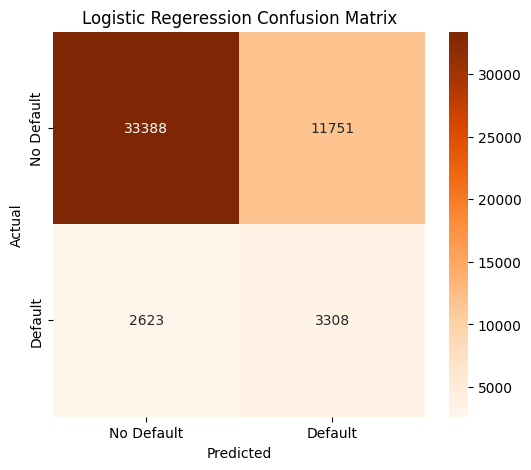

In [31]:
# Print classification report
print("Logistic Regeression Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges", xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regeression Confusion Matrix")
plt.show()

- Logistic Regression is not performing well for Class 1.
- A recall of 56% for Class 1 means nearly half of the positive cases are missed.

#### Precision-Recall Curve



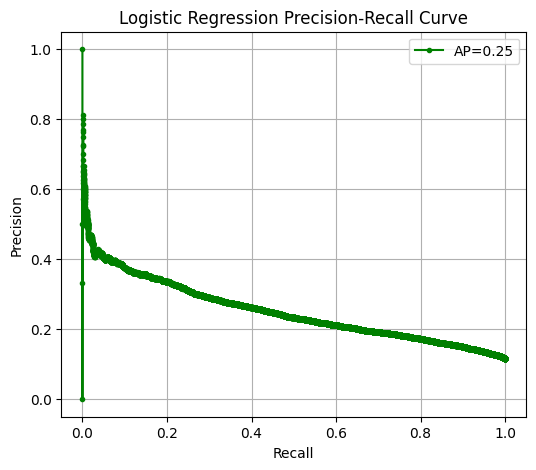

In [72]:
# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_lr)
avg_precision = average_precision_score(y_test, y_pred_prob_lr)

# Plot the Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, marker='.', label=f'AP={avg_precision:.2f}', color="green")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

- The model is not very confident in distinguishing defaulters from non-defaulters.
- This is expected in imbalanced datasets, where the positive class (defaulters) is much rarer than the negative class.
- Precision drops quickly as recall increases, meaning many false positives when trying to capture more true defaulters.

###  Random Forest:

In [54]:
# Initialize Random Forest with better settings
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

# Train the model on resampled data
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

#### Model Predictions

In [69]:
# Make predictions
y_pred = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Default)

#### Model Evaluation

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     45139
           1       0.22      0.63      0.33      5931

    accuracy                           0.70     51070
   macro avg       0.58      0.67      0.57     51070
weighted avg       0.85      0.70      0.75     51070


Confusion Matrix:
 [[31992 13147]
 [ 2176  3755]]


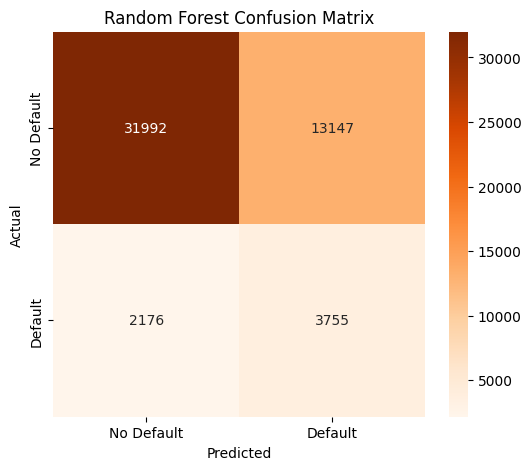

In [56]:
# Print classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges", xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

- Random Forest is slightly better at identifying Class 1 (higher recall), but precision is still bad.
- Many false positives (11,187), so the model still struggles to differentiate between classes.

#### Precision-Recall Curve

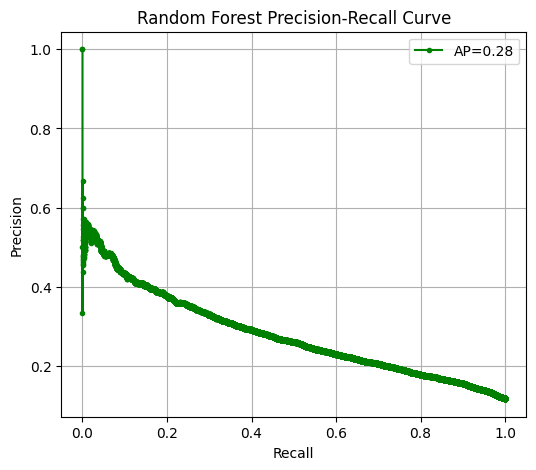

In [73]:
# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_rf)
avg_precision = average_precision_score(y_test, y_pred_prob_rf)

# Plot the Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, marker='.', label=f'AP={avg_precision:.2f}', color="green")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

### XGBoost

In [58]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    n_estimators=50,
    learning_rate=0.01,
    max_depth=5,
    min_samples_split=5,
    random_state=42
)

In [59]:
# Train the model on resampled data
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, min_samples_split=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [75]:
# Predict on test data
y_pred = xgb.predict(X_test)
y_pred_xgb = xgb.predict_proba(X_test)[:, 1]

In [66]:
# Print Classification Report
print("🔹 XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

# Print Confusion Matrix
print("\n🔹 XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

🔹 XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.70      0.80     45139
           1       0.22      0.64      0.33      5931

    accuracy                           0.69     51070
   macro avg       0.58      0.67      0.56     51070
weighted avg       0.85      0.69      0.75     51070


🔹 XGBoost Confusion Matrix:
[[31562 13577]
 [ 2131  3800]]


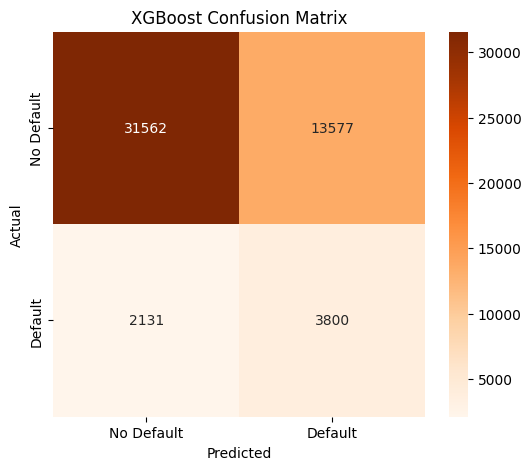

In [62]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap="Oranges", xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

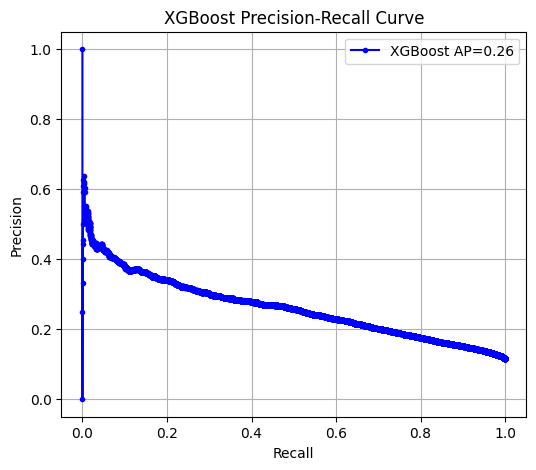

In [76]:
# Precision-Recall Curve
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)
avg_precision_xgb = average_precision_score(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
plt.plot(recall_xgb, precision_xgb, marker='.', label=f'XGBoost AP={avg_precision_xgb:.2f}', color="blue")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

### XGBoost Tuning with Randomized Search

In [77]:
# Initialize base XGBoost model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [85]:
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 3],
}

In [86]:
# Run RandomizedSearchCV (searches 10 random combinations)
random_search_xgb = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=10,  # Number of random parameter combinations to test
    scoring='recall',  # Prioritize recall for better minority class detection
    cv=3,  # 3-fold cross-validation (faster)
    n_jobs=-1,  # Use all CPU cores
    verbose=2,
    random_state=42
)

In [88]:
# Fit Randomized Search
random_search_xgb.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 5],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [50, 100],
                                        'subsample': [0.6, 0.8]},
                   random_state=42, scoring='recall', verbose=2)

In [89]:
# Retrieve the best XGBoost model from RandomizedSearchCV
best_xgb = random_search_xgb.best_estimator_

# Print the best hyperparameter combination found
print("🔹 Best Hyperparameters for XGBoost:")
print(random_search_xgb.best_params_)

🔹 Best Hyperparameters for XGBoost:
{'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [90]:
# Train XGBoost with the best parameters found
best_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [91]:
# Make predictions
y_pred_best_xgb = best_xgb.predict(X_test)

In [92]:
# Print classification report
print("\n🔹 Optimized XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))

# Print confusion matrix
print("\n🔹 Optimized XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))


🔹 Optimized XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     45139
           1       0.34      0.29      0.31      5931

    accuracy                           0.85     51070
   macro avg       0.62      0.61      0.61     51070
weighted avg       0.84      0.85      0.85     51070


🔹 Optimized XGBoost Confusion Matrix:
[[41758  3381]
 [ 4209  1722]]


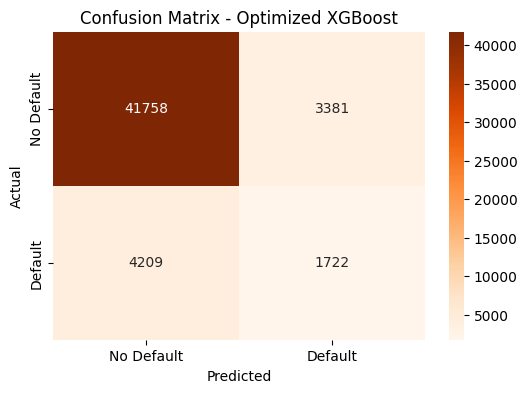

In [96]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best_xgb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Optimized XGBoost")
plt.show()

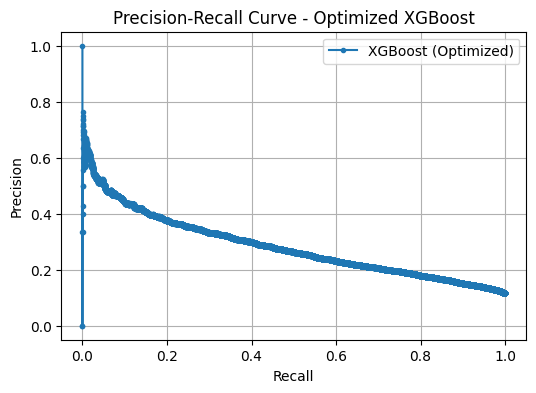

In [97]:
# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label="XGBoost (Optimized)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Optimized XGBoost")
plt.legend()
plt.grid()
plt.show()
